<a href="https://colab.research.google.com/github/siddharthanand25/siddharthanand25.github.io/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd

In [ ]:
import graphviz                #graph viz

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn import tree

In [ ]:
bank =pd.read_csv("bankdata.csv")

In [ ]:
bank.head()

age  marital  balance loan  contact deposit
0   59  married     2343   no  unknown     yes
1   56  married       45   no  unknown     yes
2   41  married     1270   no  unknown     yes
3   55  married     2476   no  unknown     yes
4   54  married      184   no  unknown     yes

In [ ]:
bank.columns

Index(['age', 'marital', 'balance', 'loan', 'contact', 'deposit'], dtype='object')

In [ ]:
bank.isnull().sum()    #dataset is clean

age        0
marital    0
balance    0
loan       0
contact    0
deposit    0
dtype: int64

In [ ]:
bank1=pd.get_dummies(bank,columns=['marital','loan','contact','deposit'],drop_first=True)
bank1.head(10)

age  balance  ...  contact_unknown  deposit_yes
0   59     2343  ...                1            1
1   56       45  ...                1            1
2   41     1270  ...                1            1
3   55     2476  ...                1            1
4   54      184  ...                1            1
5   42        0  ...                1            1
6   56      830  ...                1            1
7   60      545  ...                1            1
8   37        1  ...                1            1
9   28     5090  ...                1            1

[10 rows x 8 columns]

In [ ]:
bank1.columns

Index(['age', 'balance', 'marital_married', 'marital_single', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'deposit_yes'],
      dtype='object')

In [ ]:
#randomstate is basically used for reproducing your problem the same every time
from sklearn.model_selection import train_test_split
a,b = np.arange(10).reshape((5,2)),range(5)
print(a)
print(b)



[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


In [ ]:
train_test_split(a,b)

[array([[4, 5],
        [6, 7],
        [8, 9]]), array([[2, 3],
        [0, 1]]), [2, 3, 4], [1, 0]]

In [ ]:
train_test_split(a,b)


[array([[4, 5],
        [2, 3],
        [0, 1]]), array([[8, 9],
        [6, 7]]), [2, 1, 0], [4, 3]]

In [ ]:
train_test_split(a,b, random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [ ]:
trainx,testx,trainy,testy = train_test_split(bank1.iloc[:,:-1],bank1.iloc[:,-1],\
                                             test_size=0.3,random_state=1)


In [ ]:
dtc= DecisionTreeClassifier()

In [ ]:
dtc.fit(trainx,trainy)    #max_depth = lenght of tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict_train = dtc.predict(trainx)
predict_test = dtc.predict(testx)


In [ ]:
print("Accuracy on train data is :", accuracy_score(trainy,predict_train))
print("Accuracy on test data is :", accuracy_score(testy,predict_test))    #must be around 60-70 percent


Accuracy on train data is : 0.9791373352105466
Accuracy on test data is : 0.6103314422215587


In [ ]:
predict = dtc.predict(testx)
predict.shape

(3349,)

In [ ]:
print(accuracy_score(testy,predict)*100)   #final score

61.03314422215587


In [ ]:
print(classification_report(testy, predict))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1760
           1       0.59      0.59      0.59      1589

    accuracy                           0.61      3349
   macro avg       0.61      0.61      0.61      3349
weighted avg       0.61      0.61      0.61      3349



In [ ]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(dtc,feature_names=trainx.columns,filled=True,class_names=["0","1"],\
                                out_file=None))


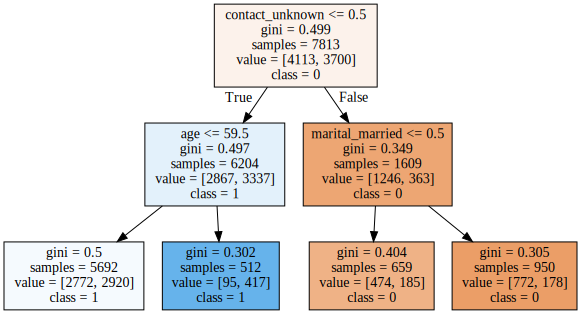

In [ ]:
dtc_2 = DecisionTreeClassifier(max_depth=2)
dtc_2.fit(trainx,trainy)
graphviz.Source(export_graphviz(dtc_2,feature_names=trainx.columns,filled=True,class_names=["0","1"],\
                                out_file=None))


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(testy, predict))

[[1109  651]
 [ 654  935]]
